# Tree 앙상블 모델

### TF-IDF-RandomForest

Accuracy: 0.8347777777777777
Classification Report:
                               precision    recall  f1-score   support

Automatically_Searching_Infor       0.99      1.00      1.00       226
         Cross_Site_Scripting       0.87      0.78      0.82       267
           Directory_Indexing       0.96      0.96      0.96        76
                    HOST_Scan       0.86      0.84      0.85      1310
           Leakage_Through_NW       1.00      0.99      1.00       198
              Path_Disclosure       0.84      0.81      0.82       965
                SQL_Injection       0.81      0.82      0.81       632
         System_Cmd_Execution       0.76      0.75      0.76      1945
           Vulnerability_Scan       0.84      0.87      0.86      3381

                     accuracy                           0.83      9000
                    macro avg       0.88      0.87      0.88      9000
                 weighted avg       0.83      0.83      0.83      9000

http: 0.01975227276464

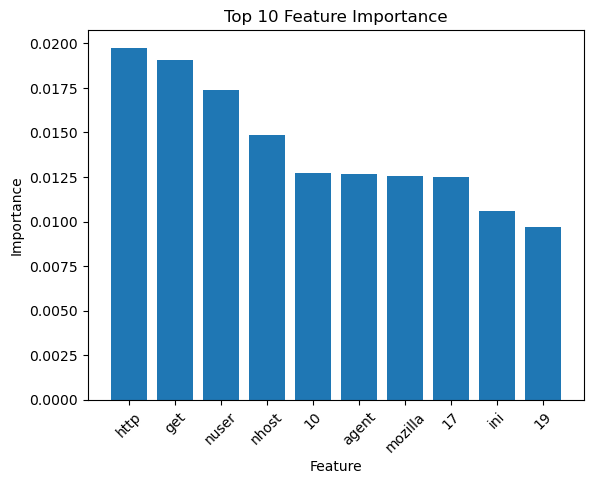

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('../dataset/A-Track-clean.csv')

# 특징(X)과 레이블(y) 분리
X = df['payload']  # 'text_column'은 텍스트 데이터가 있는 열의 이름
y = df['label_action']  # 'label_column'은 레이블이 있는 열의 이름

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류기 학습
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# 예측
y_pred = rf_classifier.predict(X_test)

# 정확도 및 분류 보고서 출력
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))






# 변수 중요도 출력
feature_importances = rf_classifier.feature_importances_
features = vectorizer.get_feature_names_out()
feature_importance_dict = dict(zip(features, feature_importances))

# 상위 10개 변수 중요도 출력
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 10
for feature, importance in sorted_feature_importances[:top_n]:
    print(f'{feature}: {importance}')

# 변수 중요도 시각화
plt.bar(range(top_n), [importance for feature, importance in sorted_feature_importances[:top_n]])
plt.xticks(range(top_n), [feature for feature, importance in sorted_feature_importances[:top_n]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()


RandomForest에서 중요도도 뽑아봤는데 일단 가중치(=변수중요도)가 높지 않고 text 데이터를 너무 잘게 나눠서 그런듯하다(아니면 특징자체가 많아서 그런듯

#### RadomForest hyperparameter tunning

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
df = pd.read_csv('../dataset/A-Track-clean.csv')

# 특징(X)과 레이블(y) 분리
X = df['payload']  # 'text_column'은 텍스트 데이터가 있는 열의 이름
y = df['label_action']  # 'label_column'은 레이블이 있는 열의 이름

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the tree
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding accuracy
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Cross-Validation Score:', grid_search.best_score_)

# Use the best model for prediction
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# 정확도 및 분류 보고서 출력
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# ... Rest of the code for feature importance visualization remains the same ...



KeyboardInterrupt



In [6]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


### nltk-tfidfvectorizer-xgboost

Xgboost에서 분류할때 라벨도 정수형 타입으로 라벨링이 되어있어야해서 그럼

그 부분 from sklearn.preprocessing import LabelEncoder 사용해서 해결

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('../dataset/A-Track-clean.csv')
except FileNotFoundError:
    print("Dataset file not found. Please provide the correct path.")
    exit(1)

# Feature (X) and label (y) separation
X = df['payload']
y = df['label_action']

# NLTK tokenization
nltk_tokenizer = nltk.word_tokenize

# TF-IDF vectorization with improved parameters
vectorizer = TfidfVectorizer(tokenizer=nltk_tokenizer, max_df=0.9, min_df=5, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred_encoded = rf_classifier.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred_encoded))
print('Classification Report:')
print(classification_report(y_test, y_pred_encoded, target_names=label_encoder.classes_))

# Feature importance
feature_importances = rf_classifier.feature_importances_
features = vectorizer.get_feature_names_out()
feature_importance_dict = dict(zip(features, feature_importances))

# Top 10 feature importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 10
for feature, importance in sorted_feature_importances[:top_n]:
    print(f'{feature}: {importance}')

# Visualize feature importance
plt.bar(range(top_n), [importance for feature, importance in sorted_feature_importances[:top_n]])
plt.xticks(range(top_n), [feature for feature, importance in sorted_feature_importances[:top_n]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()


정확도: 0.8671111111111112
분류 보고서:
                               precision    recall  f1-score   support

Automatically_Searching_Infor       0.99      1.00      0.99       226
         Cross_Site_Scripting       0.88      0.85      0.86       267
           Directory_Indexing       0.92      0.93      0.93        76
                    HOST_Scan       0.86      0.85      0.86      1310
           Leakage_Through_NW       1.00      1.00      1.00       198
              Path_Disclosure       0.88      0.81      0.84       965
                SQL_Injection       0.92      0.88      0.90       632
         System_Cmd_Execution       0.82      0.84      0.83      1945
           Vulnerability_Scan       0.87      0.88      0.88      3381

                     accuracy                           0.87      9000
                    macro avg       0.90      0.89      0.90      9000
                 weighted avg       0.87      0.87      0.87      9000

google.com:443\r\nuser-agent: 0.0364409461

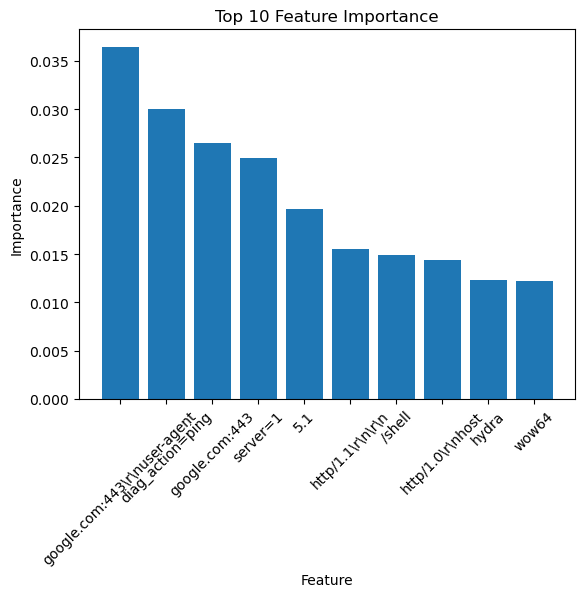

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelEncoder

# CSV 파일에서 데이터 읽기
df = pd.read_csv('../dataset/A-Track-clean.csv')

# 특징(X)과 레이블(y) 분리
X = df['payload']
y = df['label_action']

# NLTK 토큰화
nltk_tokenizer = nltk.word_tokenize

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(tokenizer=nltk_tokenizer)
X_tfidf = vectorizer.fit_transform(X)

# 레이블을 정수로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# XGBoost 분류기 학습
xgb_classifier =  XGBClassifier(n_estimators=1000, learning_rate=0.02, random_state=0, 
                         reg_alpha=0.03, colsample_bytree=0.5, max_depth=5,
                         min_child_weight=1, subsample=0.9, eval_metric='logloss')
#n_estimators : 학습 모델의 수, 많아질수록 성능 향상의 가능성이 있으나, 속도가 느려짐
#learning_rate : 학습률, 너무 크면 gradient 발산의 가능성, 너무 작으면 학습 성능 저하
#radom_state : 특정 숫자로 고정 시에 실행 시마다 고정된 결과 반환

xgb_classifier.fit(X_train, y_train)

# 예측
y_pred_encoded = xgb_classifier.predict(X_test)

# 예측된 숫자 레이블을 원래 문자열 레이블로 디코딩
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 정확도 및 분류 보고서 출력 (예측된 레이블을 정수로 변환하여 사용)
print('정확도:', accuracy_score(y_test, y_pred_encoded))
print('분류 보고서:')
print(classification_report(y_test, y_pred_encoded, target_names=label_encoder.classes_))

# 변수 중요도 출력
feature_importances = xgb_classifier.feature_importances_
features = vectorizer.get_feature_names_out()
feature_importance_dict = dict(zip(features, feature_importances))

# 상위 10개 변수 중요도 출력
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 10
for feature, importance in sorted_feature_importances[:top_n]:
    print(f'{feature}: {importance}')

# 변수 중요도 시각화
plt.bar(range(top_n), [importance for feature, importance in sorted_feature_importances[:top_n]])
plt.xticks(range(top_n), [feature for feature, importance in sorted_feature_importances[:top_n]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()


### nltk-tfidfvectorizer-catboost

In [6]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/15/95/951b51229a9c8af767e48b1f9ef7baa87279b1f5847d2f85de0855578e5d/catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


정확도: 0.8303333333333334
분류 보고서:
                               precision    recall  f1-score   support

Automatically_Searching_Infor       0.99      1.00      0.99       226
         Cross_Site_Scripting       0.76      0.80      0.78       267
           Directory_Indexing       0.91      0.84      0.88        76
                    HOST_Scan       0.87      0.78      0.82      1310
           Leakage_Through_NW       1.00      0.99      1.00       198
              Path_Disclosure       0.86      0.73      0.79       965
                SQL_Injection       0.89      0.83      0.86       632
         System_Cmd_Execution       0.80      0.78      0.79      1945
           Vulnerability_Scan       0.80      0.89      0.84      3381

                     accuracy                           0.83      9000
                    macro avg       0.88      0.85      0.86      9000
                 weighted avg       0.83      0.83      0.83      9000

?: 14.044123120175252
;: 4.905125337413293

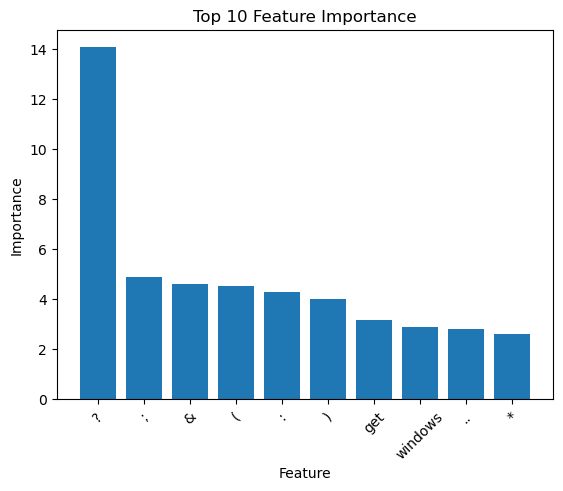

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelEncoder

# CSV 파일에서 데이터 읽기
df = pd.read_csv('../dataset/A-Track-clean.csv')

# 특징(X)과 레이블(y) 분리
X = df['payload']
y = df['label_action']

# NLTK 토큰화
nltk_tokenizer = nltk.word_tokenize

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(tokenizer=nltk_tokenizer)
X_tfidf = vectorizer.fit_transform(X)

# 레이블을 정수로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train CatBoost classifier
catboost_classifier = CatBoostClassifier(silent=True,iterations=1000, learning_rate=0.02, random_seed=0,
                                        depth=5, l2_leaf_reg=3, eval_metric='MultiClass')

catboost_classifier.fit(X_train, y_train)

# 주석 처리: xgb_classifier.fit(X_train, y_train)

# 예측
y_pred_encoded = catboost_classifier.predict(X_test)

# 예측된 숫자 레이블을 원래 문자열 레이블로 디코딩
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 정확도 및 분류 보고서 출력 (예측된 레이블을 정수로 변환하여 사용)
print('정확도:', accuracy_score(y_test, y_pred_encoded))
print('분류 보고서:')
print(classification_report(y_test, y_pred_encoded, target_names=label_encoder.classes_))

# 변수 중요도 출력
feature_importances = catboost_classifier.feature_importances_
features = vectorizer.get_feature_names_out()
feature_importance_dict = dict(zip(features, feature_importances))

# 상위 10개 변수 중요도 출력
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 10
for feature, importance in sorted_feature_importances[:top_n]:
    print(f'{feature}: {importance}')

# 변수 중요도 시각화
plt.bar(range(top_n), [importance for feature, importance in sorted_feature_importances[:top_n]])
plt.xticks(range(top_n), [feature for feature, importance in sorted_feature_importances[:top_n]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()


#### nltk-tfidfvectorizer- lightGBM

In [12]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b8/9d/1ce80cee7c5ef60f2fcc7e9fa97f29f7a8de3dc5a08922b3b2f1e9106481/lightgbm-4.1.0-py3-none-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.6 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 108378
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 1577
[LightGBM] [Info] Start training from score -3.696688
[LightGBM] [Info] Start training from score -3.505632
[LightGBM] [Info] Start training from score -4.656463
[LightGBM] [Info] Start training from score -1.973082
[LightGBM] [Info] Start training from score -3.860591
[LightGBM] [Info] Start training from score -2.245890
[LightGBM] [Info] Start training from score -2.567202
[LightGBM] [Info] Start training from score -1.521478
[LightGBM] [Info] Start training from score -0.981867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

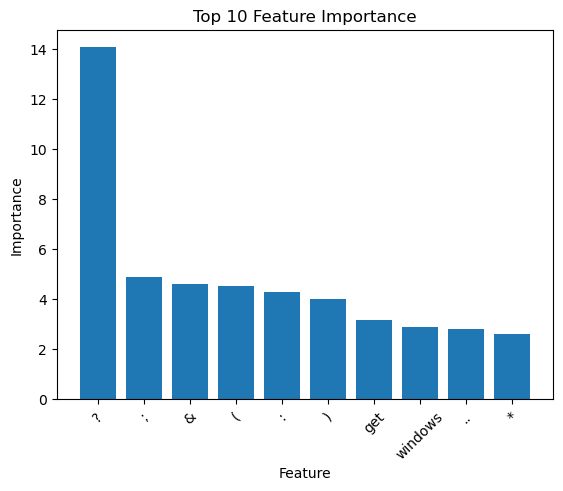

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier     #pip install lightgbm

from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelEncoder
# CSV 파일에서 데이터 읽기
df = pd.read_csv('../dataset/A-Track-clean.csv')

# 특징(X)과 레이블(y) 분리
X = df['payload']
y = df['label_action']

# NLTK 토큰화
nltk_tokenizer = nltk.word_tokenize

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(tokenizer=nltk_tokenizer)
X_tfidf = vectorizer.fit_transform(X)

# 레이블을 정수로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train CatBoost classifier
lgb_classifier = LGBMClassifier(num_leaves=31, learning_rate=0.02, n_estimators=1000,subsample=0.9, colsample_bytree=0.5, max_depth=5,force_col_wise=True)

lgb_classifier.fit(X_train, y_train)

# 예측
y_pred_encoded = lgb_classifier.predict(X_test)

# 예측된 숫자 레이블을 원래 문자열 레이블로 디코딩
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 정확도 및 분류 보고서 출력 (예측된 레이블을 정수로 변환하여 사용)
print('정확도:', accuracy_score(y_test, y_pred_encoded))
print('분류 보고서:')
print(classification_report(y_test, y_pred_encoded, target_names=label_encoder.classes_))

# 변수 중요도 출력
feature_importances = catboost_classifier.feature_importances_
features = vectorizer.get_feature_names_out()
feature_importance_dict = dict(zip(features, feature_importances))

# 상위 10개 변수 중요도 출력
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 10
for feature, importance in sorted_feature_importances[:top_n]:
    print(f'{feature}: {importance}')

# 변수 중요도 시각화
plt.bar(range(top_n), [importance for feature, importance in sorted_feature_importances[:top_n]])
plt.xticks(range(top_n), [feature for feature, importance in sorted_feature_importances[:top_n]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()


#### TFIDF-XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelEncoder  # 추가: LabelEncoder import

# CSV 파일에서 데이터 읽기
df = pd.read_csv('../dataset/A-Track-clean.csv')

# 특징(X)과 레이블(y) 분리
X = df['payload']  # 'text_column'은 텍스트 데이터가 있는 열의 이름
y = df['label_action']  # 'label_column'은 레이블이 있는 열의 이름

# NLTK 토큰화
# nltk_tokenizer = nltk.word_tokenize

# # TF-IDF 벡터화
# vectorizer = TfidfVectorizer(tokenizer=nltk_tokenizer)
# X_tfidf = vectorizer.fit_transform(X)


vectorizer = TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 2))
# vectorizer = TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'word', max_features = 1024, ngram_range = (1, 2))
X_tfidf = vectorizer.fit_transform(X)

# 레이블을 정수로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# XGBoost 분류기 학습
xgb_classifier = XGBClassifier(n_estimators=1000, learning_rate=0.02, random_state=0, 
                         reg_alpha=0.03, colsample_bytree=0.5, max_depth=5,
                         min_child_weight=1, subsample=0.9, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# 예측
y_pred_encoded = xgb_classifier.predict(X_test)

# 예측된 숫자 레이블을 원래 문자열 레이블로 디코딩
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 정확도 및 분류 보고서 출력 (예측된 레이블을 정수로 변환하여 사용)
print('정확도:', accuracy_score(y_test, y_pred_encoded))
print('분류 보고서:')
print(classification_report(y_test, y_pred_encoded, target_names=label_encoder.classes_))

# ... 이하 생략하고 나머지 코드는 그대로 유지 ...


nltk-xgboost

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelEncoder

# Read data from CSV file
df = pd.read_csv('../dataset/A-Track-clean.csv')

# Separate features (X) and labels (y)
# X = df['payload']
X = df['payload'].astype(str)  # 데이터를 문자열로 변환
y = df['label_action']

# NLTK Tokenization
nltk.download('punkt')  # Download the Punkt tokenizer models
nltk_tokenizer = nltk.word_tokenize

# Tokenize the text using NLTK tokenizer
X_tokenized = X.apply(lambda x: nltk_tokenizer(x))

# Convert label to integer
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separate into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_tokenized, y_encoded, test_size=0.2, random_state=42)

# Convert tokenized text to TF-IDF-like representation using nltk.FreqDist
def tokenize_and_vectorize(text):
    tokens = nltk_tokenizer(text)
    freq_dist = nltk.FreqDist(tokens)
    return {token: freq_dist[token] for token in tokens}

X_train_tfidf = X_train.apply(lambda x: tokenize_and_vectorize(x))
X_test_tfidf = X_test.apply(lambda x: tokenize_and_vectorize(x))

# Train XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=1000, learning_rate=0.02, random_state=0,
                         reg_alpha=0.03, colsample_bytree=0.5, max_depth=5,
                         min_child_weight=1, subsample=0.9, eval_metric='logloss')

# Convert tokenized features to numeric representation
def convert_to_numeric(tokens, token_freq):
    return [token_freq.get(token, 0) for token in tokens]

X_train_numeric = X_train_tfidf.apply(lambda x: convert_to_numeric(x.keys(), x))
X_test_numeric = X_test_tfidf.apply(lambda x: convert_to_numeric(x.keys(), x))

# Train the classifier
xgb_classifier.fit(list(X_train_numeric), y_train)

# prediction
y_pred_encoded = xgb_classifier.predict(list(X_test_numeric))

# Decode the predicted numeric label into the original string label
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Output accuracy and classification report (convert predicted labels to integers)
print('Accuracy:', accuracy_score(y_test, y_pred_encoded))
print('Category report:')
print(classification_report(y_test, y_pred_encoded, target_names=label_encoder.classes_))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: expected string or bytes-like object

#### CountVectorizer-MultionmiaNB

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# HTTP 요청 텍스트 데이터와 레이블 (9개의 클래스)
# data = [
#     ("GET /forum1_professionnel.asp?...", "label1_action"),
#     ("POST /owa/auth/logon.aspx?...", "label2_action"),
#     # Add more data points with appropriate labels based on your dataset
# ]

# 데이터를 텍스트와 레이블로 분리
# texts, labels = zip(*data)
df = pd.read_csv('../dataset/A-Track-clean.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['payload'], df['label_action'], test_size=0.2, random_state=42)

# Vectorize the HTTP request texts using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier for multiclass classification
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6754444444444444
Classification Report:
                               precision    recall  f1-score   support

Automatically_Searching_Infor       0.99      1.00      0.99       226
         Cross_Site_Scripting       0.70      0.57      0.63       267
           Directory_Indexing       0.57      0.92      0.70        76
                    HOST_Scan       0.56      0.94      0.70      1310
           Leakage_Through_NW       0.99      0.98      0.99       198
              Path_Disclosure       0.90      0.59      0.71       965
                SQL_Injection       0.41      0.68      0.51       632
         System_Cmd_Execution       0.69      0.51      0.58      1945
           Vulnerability_Scan       0.76      0.65      0.71      3381

                     accuracy                           0.68      9000
                    macro avg       0.73      0.76      0.73      9000
                 weighted avg       0.71      0.68      0.68      9000



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('../dataset/A-Track-clean.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['payload'], df['label_action'], test_size=0.2, random_state=42)

# Vectorize the HTTP request texts using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a RandomForestClassifier and perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict the labels for the test set
y_pred = grid_search.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
